# Result

Best model: XGBClassifier 

Best parameters {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}

test roc_auc_score: 0.710


# Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('bank-full.csv',delimiter=";")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# let's inspect the variable values

for var in df.columns:
    print(var, df[var].unique()[0:20], '\n')

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39] 

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital ['married' 'single' 'divorced'] 

education ['tertiary' 'secondary' 'unknown' 'primary'] 

default ['no' 'yes'] 

balance [2143   29    2 1506    1  231  447  121  593  270  390    6   71  162
  229   13   52   60    0  723] 

housing ['yes' 'no'] 

loan ['no' 'yes'] 

contact ['unknown' 'cellular' 'telephone'] 

day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2] 

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

duration [261 151  76  92 198 139 217 380  50  55 222 137 517  71 174 353  98  38
 219  54] 

campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22] 

pdays [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172] 

previous [ 0  3  1  4  2 11 16  6  5 10 12  7

In [6]:
print(f'Count of Unknown in education :',df['education'].loc[df.education == 'unknown'].count())
print(f'Count of Unknown in contact :',df['contact'].loc[df.contact == 'unknown'].count())
print(f'Count of Unknown in poutcome :',df['poutcome'].loc[df.poutcome == 'unknown'].count())
print(f'Count of Unknown in job :',df['job'].loc[df.job == 'unknown'].count())


Count of Unknown in education : 1857
Count of Unknown in contact : 13020
Count of Unknown in poutcome : 36959
Count of Unknown in job : 288


In [7]:
#Calculating missing values %

print(f'Missing values :', ((df['education'].loc[df.education == 'unknown'].count()+df['contact'].loc[df.contact == 'unknown'].count()+df['poutcome'].loc[df.poutcome == 'unknown'].count()+df['job'].loc[df.job == 'unknown'].count())/df.count().sum()*100), '%')

Missing values : 6.781795684808617 %


In [8]:
data = df.replace(to_replace={'education':'unknown','contact':'unknown','poutcome':'unknown'},value=np.nan)

In [9]:
for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39] 

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital ['married' 'single' 'divorced'] 

education ['tertiary' 'secondary' nan 'primary'] 

default ['no' 'yes'] 

balance [2143   29    2 1506    1  231  447  121  593  270  390    6   71  162
  229   13   52   60    0  723] 

housing ['yes' 'no'] 

loan ['no' 'yes'] 

contact [nan 'cellular' 'telephone'] 

day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2] 

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

duration [261 151  76  92 198 139 217 380  50  55 222 137 517  71 174 353  98  38
 219  54] 

campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22] 

pdays [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172] 

previous [ 0  3  1  4  2 11 16  6  5 10 12  7 18  9 21  8

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    43354 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      32191 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     8252 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
data.isnull().mean()

age          0.000000
job          0.000000
marital      0.000000
education    0.041074
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.287983
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64

In [12]:
#Imbalanced dataset check

data['y'].value_counts()


no     39922
yes     5289
Name: y, dtype: int64

In [13]:
# list of variables types


# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='y' and data[var].nunique()<10 or var == 'day']

continuous = [var for var in data.columns if data[var].dtype!='O' and var!='y' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 1 discrete variables
There are 6 continuous variables
There are 10 categorical variables


In [14]:
print('discrete  :', discrete )
print('continuous :', continuous)
print('categorical  :', categorical )

discrete  : ['day']
continuous : ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical  : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [15]:
#cardinality 

data[categorical].nunique()

job          12
marital       3
education     3
default       2
housing       2
loan          2
contact       2
month        12
poutcome      3
y             2
dtype: int64

In [16]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(12,3))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

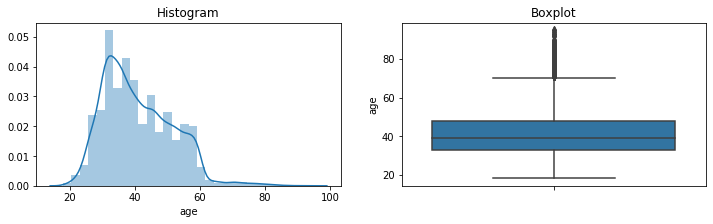

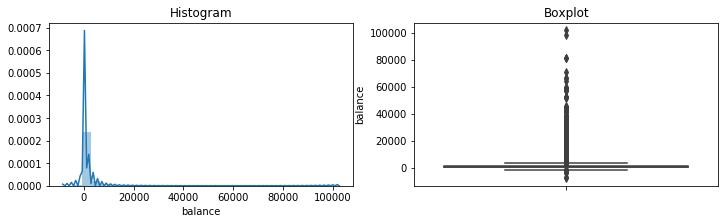

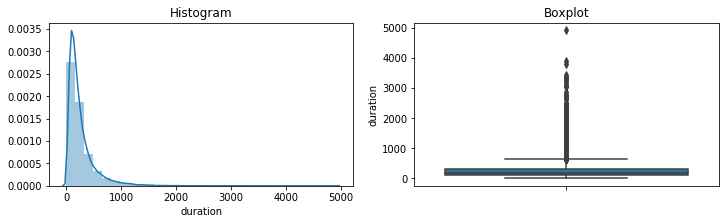

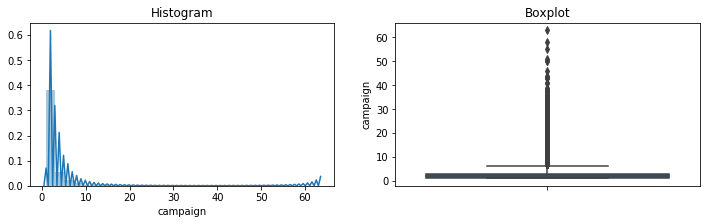

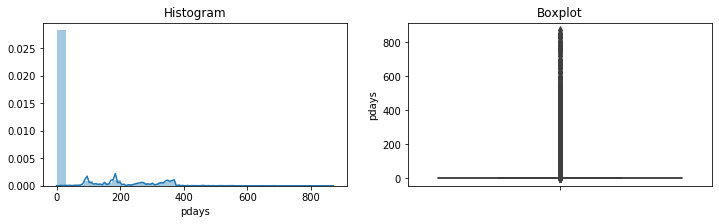

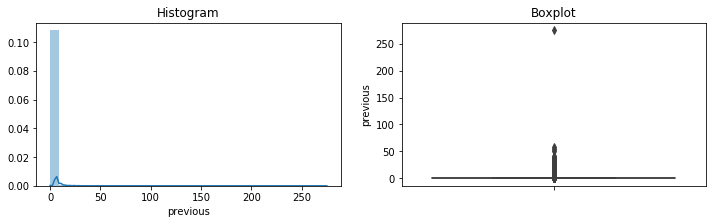

In [18]:
# Use the above function for visualizing numerical variables 

for var in continuous:
    diagnostic_plots(data, var)

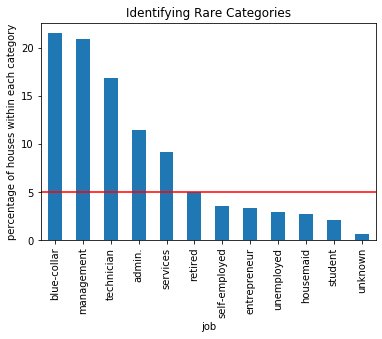

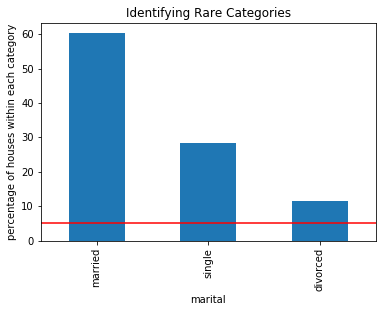

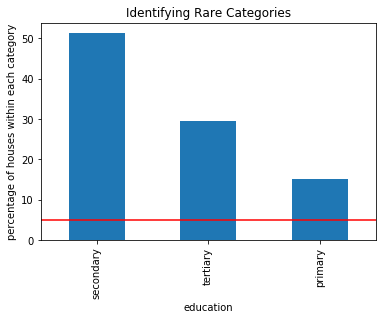

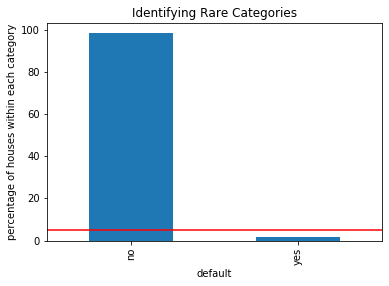

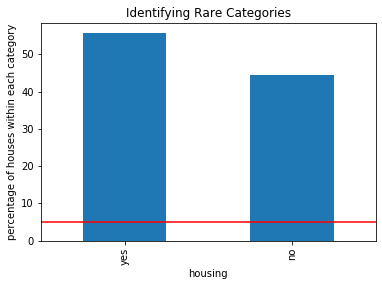

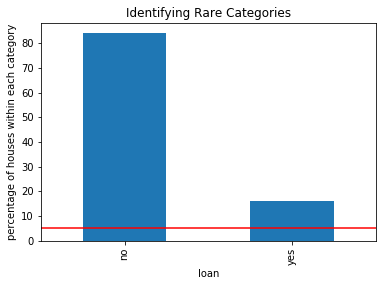

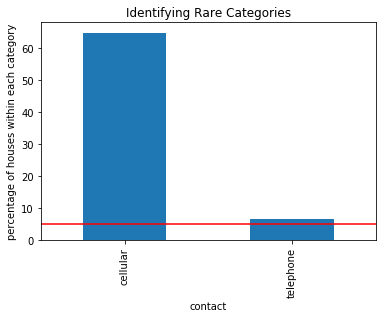

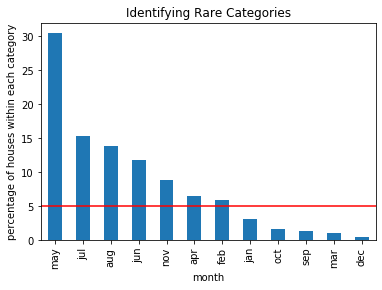

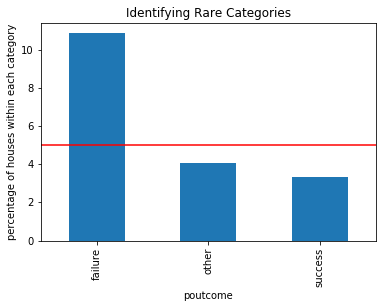

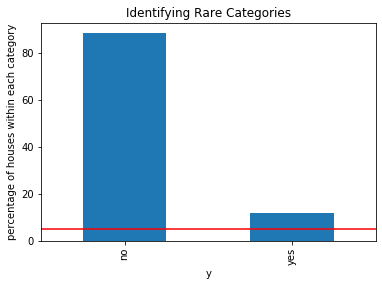

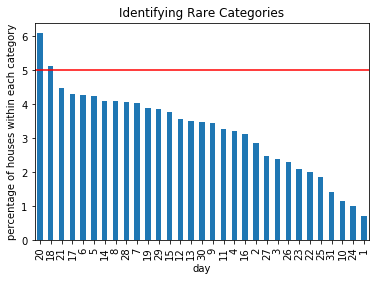

In [19]:
# outlies in categorical + discrete variables

for var in categorical+discrete:
    freq_var = 100*(data[var].value_counts() / len(data))
    # let's make plot with the category frequencies
    fig = freq_var.sort_values(ascending=False).plot.bar()

    # add a line to signal 5 % frequency limit
    # under which we will consider a category as rare
    fig.axhline(y=5, color='red')

    # add axis labels and title
    fig.set_ylabel('percentage of houses within each category')
    fig.set_xlabel(var)
    fig.set_title('Identifying Rare Categories')
    plt.show()

# Pre-Processing

In [20]:
data.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [21]:
#changing y variable (yes/no) to (1/0)

data.y = pd.Series(np.where(data.y.values == 'yes', 1, 0), data.index)

In [22]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(data.drop('y',axis=1), data.y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

In [23]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )
print(f'Val size is {X_val.shape}' )

Train size is (27126, 16)
Test size is (9043, 16)
Val size is (9042, 16)


In [24]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi

# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from feature_engine import variable_transformers as vt
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder



In [25]:
bank_pipe = Pipeline([
    
    # missing data imputation 
    ('imputer_cat_random',
    mdi.RandomSampleImputer(variables=['contact','education'])),    
  
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['poutcome'])),
    
    # categorical encoding 

    ('encoder_ordinal',
    ce.OrdinalCategoricalEncoder(encoding_method='arbitrary',variables=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])),

    ('transformer_power',
     vt.PowerTransformer(variables=['duration'])),

    # feature Scaling
    
   ('scaler', StandardScaler()),
 
 
])

In [26]:
bank_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_cat_random',
                 RandomSampleImputer(random_state=None, seed='general',
                                     seeding_method='add',
                                     variables=['contact', 'education'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['poutcome'])),
                ('encoder_ordinal',
                 OrdinalCategoricalEncoder(encoding_method='arbitrary',
                                           variables=['job', 'marital',
                                                      'education', 'default',
                                                      'housing', 'loan',
                                                      'contact', 'month',
                                                      'poutcome'])),
                ('transformer_power',
                 PowerTransformer(exp=0.5, variables=['duration'])),
                ('scaler',
               

In [27]:
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [28]:
X_train=pd.DataFrame(bank_pipe.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(bank_pipe.transform(X_test),columns=X_test.columns)
X_val=pd.DataFrame(bank_pipe.transform(X_val),columns=X_val.columns)

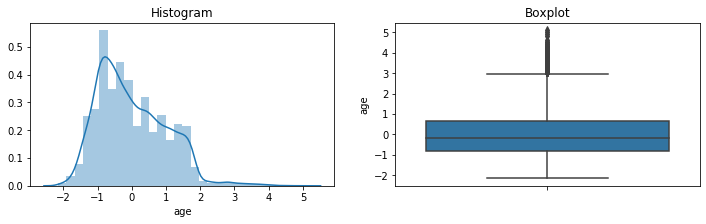

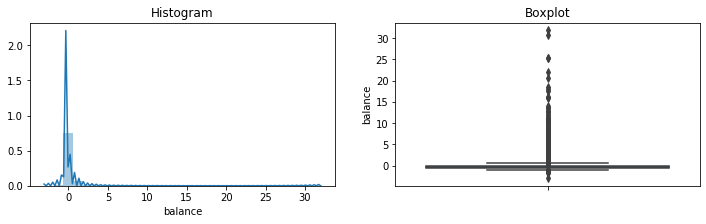

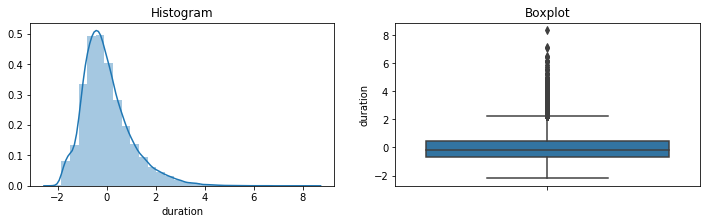

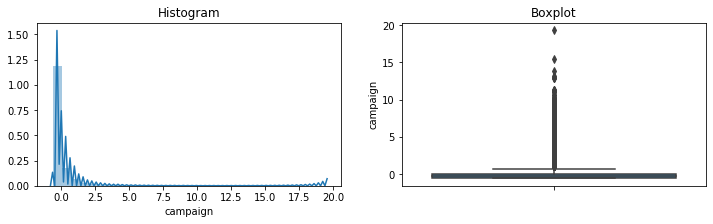

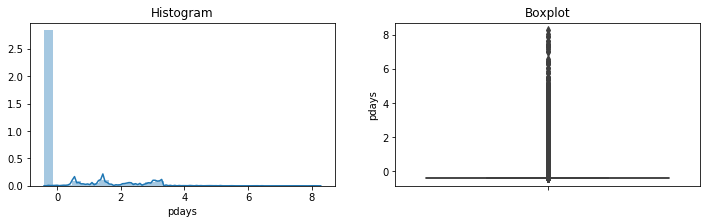

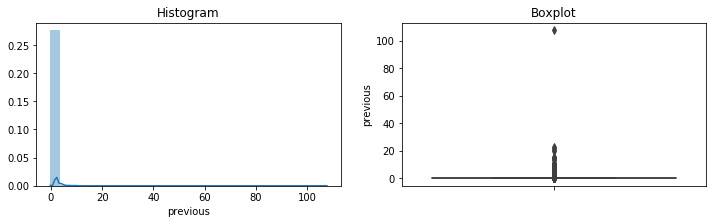

In [29]:
for var in continuous:
    diagnostic_plots(X_train, var)

In [30]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.710246,-1.139979,-0.744424,-0.840652,-0.138701,0.365658,-1.114785,-2.282890,-0.317988,0.385991,-1.203060,0.012289,-0.568798,-0.410958,-0.228217,-0.446905
1,0.956131,-0.788529,0.701670,-0.840652,-0.138701,-0.204237,0.897034,0.438041,-0.317988,-0.576051,-0.787687,0.845037,-0.568798,-0.261471,2.909651,0.753010
2,-0.646364,-0.437078,0.701670,0.508190,-0.138701,-0.113788,0.897034,-2.282890,-0.317988,-0.095030,-0.787687,-0.629077,0.073310,-0.410958,-0.228217,-0.446905
3,0.673337,-0.085628,-0.744424,-0.840652,-0.138701,-0.433839,0.897034,0.438041,-0.317988,1.227777,-0.787687,-0.658210,-0.568798,-0.410958,-0.228217,-0.446905
4,-0.080778,-1.139979,-0.744424,-0.840652,-0.138701,-0.032193,-1.114785,0.438041,-0.317988,0.145480,-0.372314,0.584294,-0.247744,-0.410958,-0.228217,-0.446905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,-0.175042,-0.788529,-0.744424,-0.840652,-0.138701,-0.317773,0.897034,0.438041,-0.317988,-1.057072,-0.787687,-0.650876,-0.568798,-0.410958,-0.228217,-0.446905
27122,-0.457835,-0.788529,0.701670,-0.840652,-0.138701,0.013348,0.897034,0.438041,-0.317988,0.025225,-0.372314,0.151445,-0.568798,-0.410958,-0.228217,-0.446905
27123,0.956131,-1.139979,-0.744424,-0.840652,-0.138701,-0.421505,-1.114785,0.438041,-0.317988,-1.658348,0.873805,-0.220351,-0.568798,-0.410958,-0.228217,-0.446905
27124,-0.929157,-0.788529,-0.744424,-0.840652,-0.138701,1.980464,0.897034,-2.282890,-0.317988,-1.538093,-1.203060,0.012289,-0.568798,-0.410958,-0.228217,-0.446905


# Basic Algorithms

## Naive Algorithm 

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [32]:
# Metric selected: 'roc_auc score'

# In this Bank dataset, the aim is to predict if the client will subscribe (yes/no) a term deposit (variable y)
# As the both classes are important here in order to understand factors affecting the client's decision, the 'roc_auc score' has been selected as a metric
# The y variable has also been converted to (1/0)

In [33]:
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check val/test data set performance
print("Naive Algorithm Val Performance: ", model_dummy.score(X_val,y_val))
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.5024565308839191

Naive Algorithm Val Performance:  0.7924131829241319
Naive Algorithm Test Performance:  0.7970806148402079


## KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

In [114]:
knn= KNeighborsClassifier()

knn_param= {'n_neighbors' : range(5,10), 'weights': ['uniform']}
knn_grid = GridSearchCV(knn, knn_param,cv=5, return_train_score=True, scoring='roc_auc')


In [127]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(5, 10), 'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [116]:
print(f'Best Mean Cross Validation Score is {knn_grid.best_score_}')
print(f'Best parameters {knn_grid.best_params_}')
print(f'Train score is {knn_grid.score(X_train,y_train)}')
print(f'Test score is {knn_grid.score(X_test,y_test)}')
print(f'Validation score is {knn_grid.score(X_val,y_val)}')

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

## Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [0.005,0.007,0.01,0.03,0.05]}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True,scoring='roc_auc' )
logreg_grid.fit(X_train,y_train)

In [117]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best parameters are: {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')
print(f'Val score is {logreg_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8740453731629392
Best parameters are: {'C': 0.007}
Train score is 0.8747008024098955
Test score is 0.8659294048856856
Val score is 0.8784291797348962


## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
'''
lsvc = LinearSVC(max_iter=1000000)
lsvc_param = {'C': [5,10,20,50,100],
              }
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True, scoring='roc_auc')
lsvc_grid.fit(X_train,y_train)
'''

In [ ]:
'''
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')
print(f'Val score is {lsvc_grid.score(X_val,y_val)}')
'''

## Kernel SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
#unable to run Kernel SVC 

ksvc=SVC(probability=True)
ksvc_param = [
              {'kernel': ['rbf'],
               'C': [ 0.01, 0.1, 1, 10],
               'gamma': [ 0.01, 0.1, 1, 10]},
             
              {'kernel': ['poly'],
               'C': [ 0.01, 0.1, 1, 10, ],
              'gamma': [ 0.01, 0.1, 1, 10],
              'degree' : range(1,3)},
             
             {'kernel': ['sigmoid'],
               'C': [ 0.01, 0.1, 1, 10],
               'gamma': [ 0.01, 0.1, 1, 10]}]

ksvc_grid = GridSearchCV(ksvc, ksvc_param,cv=3, return_train_score=True, scoring='roc_auc')
ksvc_grid.fit(X_train,y_train)


In [ ]:
'''
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_params_}')
print(f'Train score is {ksvc_grid.score(X_train,y_train)}')
print(f'Test score is {ksvc_grid.score(X_test,y_test)}')
print(f'Val score is {ksvc_grid.score(X_val,y_val)}')
'''

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree_param = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}
dtree_grid = GridSearchCV(dtree, dtree_param,cv=5, return_train_score=True, scoring='roc_auc')
dtree_grid.fit(X_train,y_train)

In [118]:
print(f'Best Mean Cross Validation Score is {dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {dtree_grid.best_params_}')
print(f'Train score is {dtree_grid.score(X_train,y_train)}')
print(f'Test score is {dtree_grid.score(X_test,y_test)}')
print(f'Val score is {dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.7946708028753993
Best Mean Cross Validation Score is {'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2, 'splitter': 'best'}
Train score is 0.7967835159415655
Test score is 0.8006260359270708
Val score is 0.7924497493189258


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring='roc_auc')
rfc_grid.fit(X_train,y_train)

In [119]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best parameters are {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
print(f'Val score is {rfc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9162478075612354
Best parameters are {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9371735178076348
Test score is 0.9131837118666846
Val score is 0.916296788077196


## Extra-trees

In [ ]:
from  sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, scoring='roc_auc')
etc_grid.fit(X_train,y_train)

In [120]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
print(f'Val score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9020786273695421
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9135381877799104
Test score is 0.8974555391300454
Val score is 0.8998310478239966


## Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

### adc_tree

In [ ]:
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, scoring='roc_auc')
adc_dtree_grid.fit(X_train,y_train)

In [121]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')
print(f'Val score is {adc_dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9115218116613418
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__splitter': 'random', 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9213871427809768
Test score is 0.9058858340583349
Val score is 0.911551475469884


### adc_rf

In [ ]:
adc_rf =AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42,n_estimators=500,max_features='auto',max_depth=8,criterion='entropy'))

adc_rf_param = {
                }

adc_rf_grid = GridSearchCV(adc_rf, adc_rf_param,cv=5, return_train_score=True, scoring='roc_auc')
adc_rf_grid.fit(X_train,y_train)

In [122]:
print(f'Best Mean Cross Validation Score is {adc_rf_grid.best_score_}')
print(f'Best parameters are {adc_rf_grid.best_params_}')
print(f'Train score is {adc_rf_grid.score(X_train,y_train)}')
print(f'Test score is {adc_rf_grid.score(X_test,y_test)}')
print(f'Val score is {adc_rf_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9155593138445154
Best parameters are {}
Train score is 0.9999914294092557
Test score is 0.9105930395131762
Val score is 0.9195661729356012


## Gradient boost

In [ ]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring='roc_auc')
gbc_grid.fit(X_train,y_train)

In [123]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best parameters are {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
print(f'Val score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.919113330457934
Best parameters are {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
Train score is 0.946681588558328
Test score is 0.9165246135093141
Val score is 0.9202021473867357


## XG boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring='roc_auc' )
xgbc_grid.fit(X_train,y_train)

In [124]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best parameters {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
print(f'Val score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9273613274760383
Best parameters {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}
Train score is 0.9625074509490297
Test score is 0.9224629070323976
Val score is 0.9284558503697259


## Summary

### All classifiers

In [ ]:
classifiers={'knn':knn_grid ,
             'logreg':logreg_grid,
#             'lsvc':lsvc_grid,
#            'ksvc':ksvc_grid,
             'dtree':dtree_grid,
#            'bag_dtree1':bag_dtree1_grid,
#            'bag_dtree1':bag_dtree2_grid,
#            'bag_logreg1':bag_logreg1_grid,
#            'paste_dtree1': paste_dtree1_grid,
#            'paste_dtree1':paste_dtree2_grid,
#            'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'adc_rf':adc_rf_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [ ]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [125]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
8,xgbc,0.927361,0.005129
7,gbc,0.919113,0.005684
3,rfc,0.916248,0.006837
6,adc_rf,0.915559,0.004875
5,adc_dtree,0.911522,0.003954
4,etc,0.902079,0.005913
1,logreg,0.874045,0.004953
0,knn,0.839010,0.005369
2,dtree,0.794671,0.017171


### Correlation

In [ ]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_val)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [ ]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

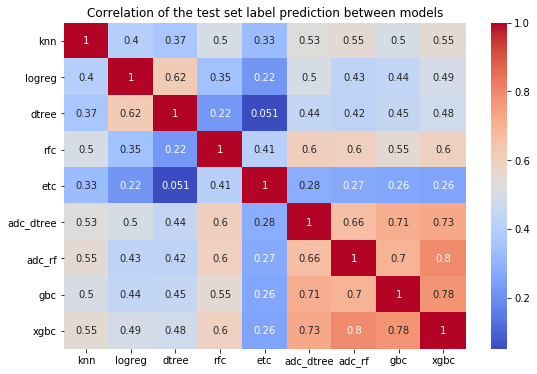

In [128]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [126]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred))

Top Absolute Correlations
dtree   etc     0.050737
logreg  etc     0.220105
dtree   rfc     0.224211
etc     xgbc    0.258012
        gbc     0.261597
dtype: float64


## Stacking 

In [ ]:
classifiers={'knn':knn_grid ,
             'logreg':logreg_grid,
#             'lsvc':lsvc_grid,
#            'ksvc':ksvc_grid,
             'dtree':dtree_grid,
#            'bag_dtree1':bag_dtree1_grid,
#            'bag_dtree1':bag_dtree2_grid,
#            'bag_logreg1':bag_logreg1_grid,
#            'paste_dtree1': paste_dtree1_grid,
#            'paste_dtree1':paste_dtree2_grid,
#            'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'adc_rf':adc_rf_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [129]:
#top 3 estimators
estimators_ = [('rfc',rfc_grid.best_estimator_),
               ('etc',etc_grid.best_estimator_),
               ('gbc',gbc_grid.best_estimator_)]

In [131]:
from sklearn.ensemble import StackingClassifier

sclf1 = StackingClassifier(estimators= estimators_
                            , final_estimator=XGBClassifier())
sclf1_param = {
                'final_estimator__max_depth' : [6],
              'final_estimator__n_estimators' : [150],
              'final_estimator__learning_rate' : [0.1],
               'final_estimator__min_child_weight' : [7],
                'final_estimator__subsample':[0.9],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best parameters are {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

#Best parameters {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}

Best Mean Cross Validation Score is 0.9198597159744409
Best parameters are {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 6, 'final_estimator__min_child_weight': 7, 'final_estimator__n_estimators': 150, 'final_estimator__subsample': 0.9, 'stack_method': 'auto'}
Train score is 0.9418481352633824
Test score is 0.9186270002381306


# Cost Sensitive Algorithms

## Logistic

In [132]:
logreg = LogisticRegression(solver='lbfgs')
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(grid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_logreg.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.88


## Decision tree

In [133]:
dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_dtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(grid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_dtree.best_score_))

Best parameters: {'class_weight': {0: 100, 1: 1}}
Best Mean cross-validation score: 0.71


## SVM

In [134]:
svc = SVC()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_svc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svc.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.89


## Random Forest

In [135]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],

}

grid_rfc = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring='roc_auc')
grid_rfc.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_rfc.best_score_}')
print(f'Best parameters are {grid_rfc.best_params_}')



Best Mean Cross Validation Score is 0.9182026780085197
Best parameters are {'class_weight': {0: 1, 1: 1}}


## XG Boost

In [136]:
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}

#apply grid search
grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_xgboost.fit(X_train,y_train)

print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.92


## Extra trees

In [137]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],

}

grid_etc = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, scoring='roc_auc')
grid_etc.fit(X_train,y_train)

print("Best parameters: {}".format(grid_etc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_etc.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.92


## Bagging with sampling


In [138]:
from sklearn.ensemble import BaggingClassifier

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN


In [139]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.902


In [140]:
scores.mean()

0.9019302910926561

# Data Sampling Algorithms

In [141]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## Logistic Regression

In [142]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.87


## Decision Tree

In [143]:
#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.87


## KNN

In [144]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.83


## SVM

In [ ]:
'''
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))
'''

## Random forest

In [146]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto',max_depth=8))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5],
               }

ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.3f}".format(ogrid_rf.best_score_))


Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.909


## Easy Ensemble Classifier

In [147]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.89


## XgBoost

In [148]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))


Best parameters: {'smote__k_neighbors': 3, 'xgb__learning_rate': 0.5}
Best Mean cross-validation score: 0.92


## Summary

### All classifiers

In [151]:
classifiers={
    # simple models
             'logreg':logreg_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'adc_rf':adc_rf_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid,
    # cost sensitive models          
            'c_logreg':grid_logreg,
            'c_dtree':grid_dtree,
            'c_svc':grid_svc,
            'c_rfc':grid_rfc,
            'c_xgb':grid_xgboost,
            'c_etc':grid_etc,
    # Data sampling models
            'o_lg':ogrid_lg,
            'o_dtree':ogrid_dtree,
            'o_knn':ogrid_knn,
#            'o_svm':ogrid_svm,
            'o_rf':ogrid_rf,
            'o_ee':ogrid_ee,
            'o_xgb':ogrid_xgb,
            }

In [152]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [153]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
6,xgbc,0.927361,0.005129
11,c_xgb,0.921890,0.004749
5,gbc,0.919113,0.005684
10,c_rfc,0.918203,0.004068
18,o_xgb,0.916923,0.005557
1,rfc,0.916248,0.006837
4,adc_rf,0.915559,0.004875
12,c_etc,0.915412,0.003643
3,adc_dtree,0.911522,0.003954
16,o_rf,0.909410,0.006706


### Correlation

In [154]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_val)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [155]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

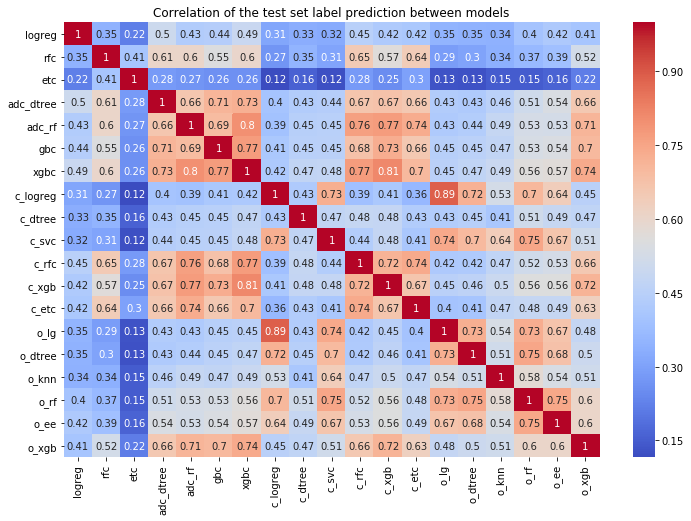

In [156]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [157]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [158]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred))

Top Absolute Correlations
etc  c_logreg    0.116003
     c_svc       0.124236
     o_dtree     0.128172
     o_lg        0.129963
     o_knn       0.147944
dtype: float64


## Stacking Classifiers

In [159]:
#top 3 estimators
estimators2_ = [('etc',etc_grid.best_estimator_),
               ('rfc',rfc_grid.best_estimator_),
               ('o_xgb',ogrid_xgb.best_estimator_)]

In [160]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators2_
                            , final_estimator=XGBClassifier())
sclf2_param = {
              'final_estimator__max_depth' : [6],
              'final_estimator__n_estimators' : [150],
              'final_estimator__learning_rate' : [0.1],
              'final_estimator__min_child_weight' : [7],
              'final_estimator__subsample':[0.9],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

#Best parameters {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}


Best Mean Cross Validation Score is 0.9214481492545261
Best Mean Cross Validation params is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 6, 'final_estimator__min_child_weight': 7, 'final_estimator__n_estimators': 150, 'final_estimator__subsample': 0.9, 'stack_method': 'auto'}
Train score is 0.9491159562273406
Test score is 0.9198141756083531


# Final model

In [161]:
# Best model: XG boost

In [162]:
from math import sqrt
from sklearn.metrics import roc_auc_score


#Best model: XG boost

# let's get the predictions
X_train_preds = xgbc_grid.predict(X_train)
X_val_preds = xgbc_grid.predict(X_val)
X_test_preds = xgbc_grid.predict(X_test)

print('train roc_auc_score: {:.3f}'.format(roc_auc_score(y_train, X_train_preds)))
print('val roc_auc_score: {:.3f}'.format(roc_auc_score(y_val, X_val_preds)))
print('test roc_auc_score: {:.3f}'.format(roc_auc_score(y_test, X_test_preds)))

train roc_auc_score: 0.785
val roc_auc_score: 0.708
test roc_auc_score: 0.710
